Applied AI Assignment 2
MAX BARNETT & YAZAN QASEM

In [ ]:
# Install essential packages and libraries
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam,RMSprop, Adagrad

In [ ]:
# Import the data
data_original = pd.read_csv ("/content/kc_house_data.csv")
data = data_original.copy()
corr = data.corr()
print(corr['price'].sort_values(ascending = False)) 

In [ ]:
# Extract the year from 'date' and drop irrelevant columns
data['year_sold'] = pd.to_datetime(data['date']).dt.date.astype('datetime64[ns]')
data['year_sold'] = pd.DatetimeIndex(data['year_sold']).year # Drop everything except the year
data = data.drop(columns=["id","date", "zipcode"])

In [ ]:
# Create new column, age, represents amount of years from the year built to year sold
# If renovation has occured, take the age as the number of years since renovation 
conditions = [data['yr_renovated'] == 0, data['yr_renovated'] != 0]
choices_age = [data['year_sold'] - data['yr_built'], data['year_sold'] - data['yr_renovated']]
data['age'] = np.select(conditions, choices_age)
data = data.drop(columns=["year_sold", "yr_built", "yr_renovated"])
print(data)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement      lat  \
0               0     0          3      7        1180             

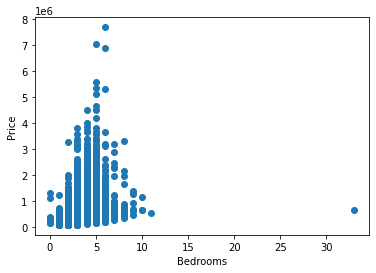

In [ ]:
# Remove outliers manualy
# Bedrooms
plt.scatter(data[['bedrooms']], data[['price']])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()
data = data.drop(data[data.bedrooms > 30].index)

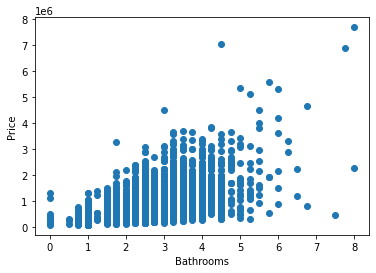

In [ ]:
# Bathrooms
plt.scatter(data[['bathrooms']], data[['price']])
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

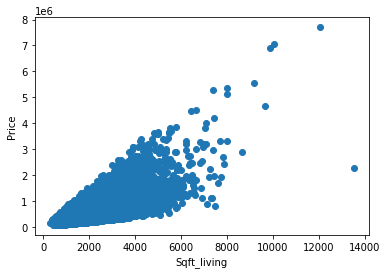

In [ ]:
# sqft_living  
plt.scatter(data[['sqft_living']], data[['price']])
plt.xlabel('Sqft_living')
plt.ylabel('Price')
plt.show()
data = data.drop(data[data.sqft_living > 11000].index)

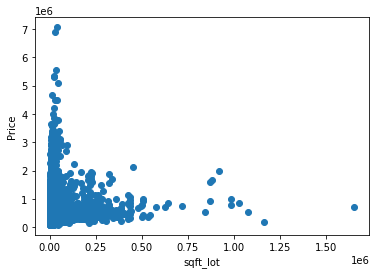

In [ ]:
# sqft_lot    
plt.scatter(data[['sqft_lot']], data[['price']])
plt.xlabel('sqft_lot')
plt.ylabel('Price')
plt.show()
data = data.drop(data[data.sqft_lot > 1500000].index)

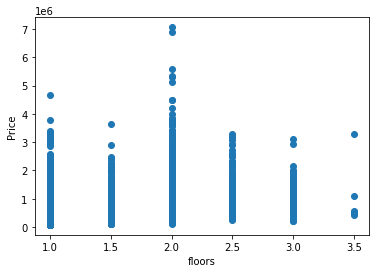

In [ ]:
# floors      
plt.scatter(data[['floors']], data[['price']])
plt.xlabel('floors')
plt.ylabel('Price')
plt.show()

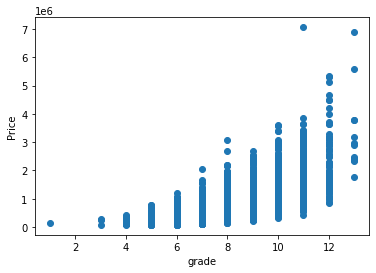

In [ ]:
# grade        
plt.scatter(data[['grade']], data[['price']])
plt.xlabel('grade')
plt.ylabel('Price')
plt.show()

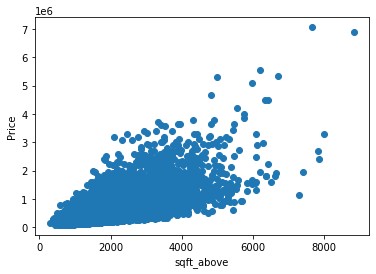

In [ ]:
# sqft_above  
plt.scatter(data[['sqft_above']], data[['price']])
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.show()

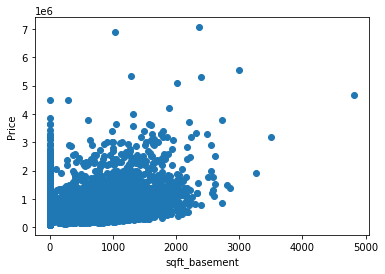

In [ ]:
# sqft_basement        
plt.scatter(data[['sqft_basement']], data[['price']])
plt.xlabel('sqft_basement')
plt.ylabel('Price')
plt.show()
data = data.drop(data[data.sqft_basement > 4000].index)

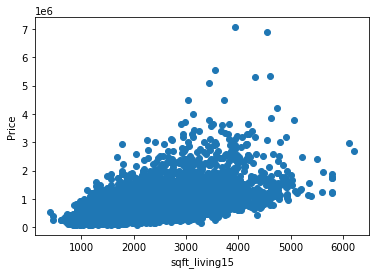

In [ ]:
# sqft_living15            
plt.scatter(data[['sqft_living15']], data[['price']])
plt.xlabel('sqft_living15')
plt.ylabel('Price')
plt.show()

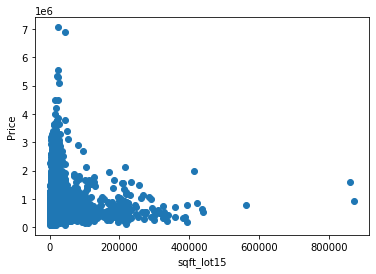

In [ ]:
# sqft_lot15  
plt.scatter(data[['sqft_lot15']], data[['price']])
plt.xlabel('sqft_lot15')
plt.ylabel('Price')
plt.show()
data = data.drop(data[data.sqft_lot15 > 60000].index)

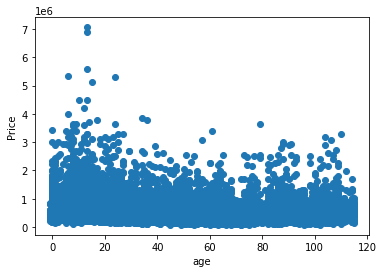

In [ ]:
# age
plt.scatter(data[['age']], data[['price']])
plt.xlabel('age')
plt.ylabel('Price')
plt.show()

In [ ]:
# Split data into training, validation and testing
features = data.iloc[:, 1:]
labels = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 1, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 1, shuffle = True)

In [ ]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_val_std = scaler.transform(X_val)
X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns = X_test.columns)
X_val_std = pd.DataFrame(X_val_std, columns = X_val.columns)

In [ ]:
# Create keras classifier neural network with default parameters
def NN(optimizer = 'adam',neurons=16,batch_size=32,epochs=50,activation='relu',loss='mse', learning_rate=0.1):
    model = Sequential()
    model.add(Dense(neurons, activation=activation)) #Input layer
    model.add(Dense(neurons, activation=activation)) #Hidden layer
    model.add(Dense(neurons, activation=activation)) #Hidden layer
    model.add(Dense(neurons, activation=activation)) #Hidden layer
    model.add(Dense(1)) #Output layer
    model.compile(optimizer = optimizer, loss=loss)
    history = model.fit(X_train_std, y_train, validation_data=(X_val_std, y_val), batch_size=batch_size, epochs=epochs, verbose=0) 
    return model

In [ ]:
# Function for plotting loss function
def loss_function_graph(data):
  sns.lineplot(data = data, lw = 3)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training Loss Per Epoch')
  plt.legend(loc = 'upper right')
  plt.show()

In [ ]:
# Function for randomized search
def random_search(parameters):
  regressor = KerasRegressor(build_fn=NN, verbose=0)
  search = RandomizedSearchCV(regressor,n_jobs=-1, param_distributions=parameters, n_iter=10, cv=KFold(5), scoring='neg_mean_squared_error', verbose=0)
  test_result = search.fit(X_test_std, y_test, )
  print('For Training: \nBest Score: %s' % str(-test_result.best_score_))
  print('Best Hyperparameters: %s' % test_result.best_params_)

Epoch 1/50
395/395 [==============================] - 1s 2ms/step - loss: 425308487680.0000 - val_loss: 429313097728.0000
Epoch 2/50
395/395 [==============================] - 1s 1ms/step - loss: 425261334528.0000 - val_loss: 429238779904.0000
Epoch 3/50
395/395 [==============================] - 1s 1ms/step - loss: 425165783040.0000 - val_loss: 429115834368.0000
Epoch 4/50
395/395 [==============================] - 1s 2ms/step - loss: 425028747264.0000 - val_loss: 428953174016.0000
Epoch 5/50
395/395 [==============================] - 1s 1ms/step - loss: 424854355968.0000 - val_loss: 428752699392.0000
Epoch 6/50
395/395 [==============================] - 1s 1ms/step - loss: 424644018176.0000 - val_loss: 428515721216.0000
Epoch 7/50
395/395 [==============================] - 1s 1ms/step - loss: 424401600512.0000 - val_loss: 428247711744.0000
Epoch 8/50
395/395 [==============================] - 1s 1ms/step - loss: 424129757184.0000 - val_loss: 427950637056.0000
Epoch 9/50
395/395 [====

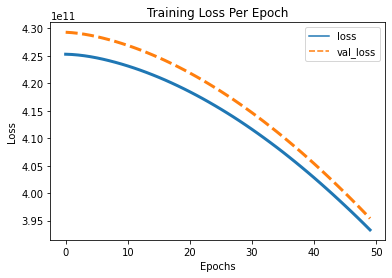

In [ ]:
# Tuning the number of hidden layers
# 0 Hidden Layers
mse=[]
opt = Adam(learning_rate=0.1)
model = Sequential()
model.add(Dense(16, activation='relu')) #Input layer
model.add(Dense(1)) #Output layer
model.compile(optimizer = 'adam', loss='mse')
model.fit(X_train_std, y_train, validation_data=(X_val_std, y_val), epochs=50, batch_size=32)
lr_train_loss = pd.DataFrame(model.history.history)
loss_function_graph(lr_train_loss)
y_pred = model.predict(X_test_std)

Epoch 1/100
790/790 [==============================] - 19s 23ms/step - loss: 424332623872.0000 - val_loss: 425316155392.0000
Epoch 2/100
790/790 [==============================] - 1s 2ms/step - loss: 412691398656.0000 - val_loss: 402777538560.0000
Epoch 3/100
790/790 [==============================] - 1s 2ms/step - loss: 377892044800.0000 - val_loss: 353015988224.0000
Epoch 4/100
790/790 [==============================] - 1s 2ms/step - loss: 320055377920.0000 - val_loss: 285172269056.0000
Epoch 5/100
790/790 [==============================] - 1s 2ms/step - loss: 251548827648.0000 - val_loss: 213717991424.0000
Epoch 6/100
790/790 [==============================] - 1s 2ms/step - loss: 185420791808.0000 - val_loss: 152474419200.0000
Epoch 7/100
790/790 [==============================] - 1s 2ms/step - loss: 135068991488.0000 - val_loss: 112186032128.0000
Epoch 8/100
790/790 [==============================] - 1s 2ms/step - loss: 104325791744.0000 - val_loss: 90679517184.0000
Epoch 9/100
790

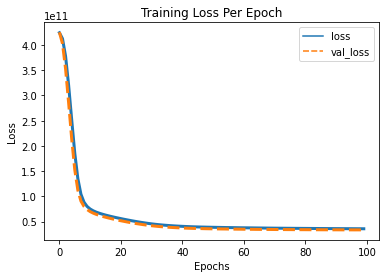

MSE: 30409694913.782673


In [ ]:
# Tuning the number of hidden layers
# 1 Hidden Layer
opt = Adam(learning_rate=0.01)
model = Sequential()
model.add(Dense(16, activation='relu')) #Input layer
model.add(Dense(16, activation='relu')) #Hidden layer
model.add(Dense(1)) #Output layer
model.compile(optimizer = 'adam', loss='mse')
model.fit(X_train_std, y_train, validation_data=(X_val_std, y_val), epochs=100, batch_size=16)
lr_train_loss = pd.DataFrame(model.history.history)
loss_function_graph(lr_train_loss)
y_pred = model.predict(X_test_std)
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))

Epoch 1/100
790/790 [==============================] - 2s 2ms/step - loss: 388222943232.0000 - val_loss: 256102367232.0000
Epoch 2/100
790/790 [==============================] - 1s 2ms/step - loss: 120062402560.0000 - val_loss: 70640861184.0000
Epoch 3/100
790/790 [==============================] - 1s 2ms/step - loss: 66718150656.0000 - val_loss: 58681589760.0000
Epoch 4/100
790/790 [==============================] - 1s 2ms/step - loss: 58646736896.0000 - val_loss: 52288827392.0000
Epoch 5/100
790/790 [==============================] - 1s 2ms/step - loss: 53151354880.0000 - val_loss: 47287312384.0000
Epoch 6/100
790/790 [==============================] - 1s 2ms/step - loss: 48552710144.0000 - val_loss: 43351470080.0000
Epoch 7/100
790/790 [==============================] - 1s 2ms/step - loss: 44944117760.0000 - val_loss: 40286924800.0000
Epoch 8/100
790/790 [==============================] - 1s 2ms/step - loss: 42260713472.0000 - val_loss: 38223761408.0000
Epoch 9/100
790/790 [========

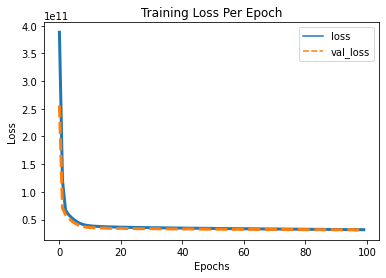

MSE: 27725138012.735313


In [ ]:
# 2 Hidden Layers
opt = Adam(learning_rate=0.01)
model = Sequential()
model.add(Dense(16, activation='relu')) #Input layer
model.add(Dense(16, activation='relu')) #Hidden layer
model.add(Dense(16, activation='relu')) #Hidden layer
model.add(Dense(1)) #Output layer
model.compile(optimizer = 'adam', loss='mse')
model.fit(X_train_std, y_train, validation_data=(X_val_std, y_val), epochs=100, batch_size=16)
lr_train_loss = pd.DataFrame(model.history.history)
loss_function_graph(lr_train_loss)
y_pred = model.predict(X_test_std)
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))

Epoch 1/100
790/790 [==============================] - 2s 2ms/step - loss: 238263369728.0000 - val_loss: 60263763968.0000
Epoch 2/100
790/790 [==============================] - 1s 2ms/step - loss: 55552315392.0000 - val_loss: 46207778816.0000
Epoch 3/100
790/790 [==============================] - 1s 2ms/step - loss: 45619806208.0000 - val_loss: 39303852032.0000
Epoch 4/100
790/790 [==============================] - 1s 2ms/step - loss: 41195466752.0000 - val_loss: 37063790592.0000
Epoch 5/100
790/790 [==============================] - 2s 2ms/step - loss: 39365120000.0000 - val_loss: 35734593536.0000
Epoch 6/100
790/790 [==============================] - 1s 2ms/step - loss: 38255009792.0000 - val_loss: 35106779136.0000
Epoch 7/100
790/790 [==============================] - 2s 2ms/step - loss: 37484650496.0000 - val_loss: 34763890688.0000
Epoch 8/100
790/790 [==============================] - 1s 2ms/step - loss: 37090308096.0000 - val_loss: 34269034496.0000
Epoch 9/100
790/790 [==========

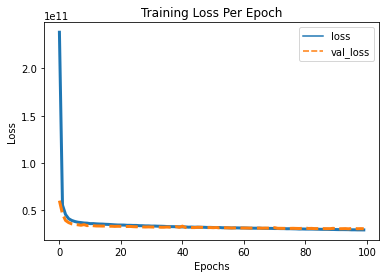

MSE: 26720932541.215954


In [ ]:
# 3 Hidden Layers
opt = Adam(learning_rate=0.1)
model = Sequential()
model.add(Dense(16, activation='relu')) #Input layer
model.add(Dense(16, activation='relu')) #Hidden layer
model.add(Dense(16, activation='relu')) #Hidden layer
model.add(Dense(16, activation='relu')) #Hidden layer
model.add(Dense(1)) #Output layer
model.compile(optimizer = 'adam', loss='mse')
model.fit(X_train_std, y_train, validation_data=(X_val_std, y_val), epochs=100, batch_size=16)
lr_train_loss = pd.DataFrame(model.history.history)
loss_function_graph(lr_train_loss)
y_pred = model.predict(X_test_std)
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))

Epoch 1/100
790/790 [==============================] - 4s 4ms/step - loss: 220440707072.0000 - val_loss: 55146270720.0000
Epoch 2/100
790/790 [==============================] - 2s 3ms/step - loss: 49655640064.0000 - val_loss: 40562884608.0000
Epoch 3/100
790/790 [==============================] - 1s 2ms/step - loss: 41623166976.0000 - val_loss: 36641562624.0000
Epoch 4/100
790/790 [==============================] - 1s 2ms/step - loss: 38757756928.0000 - val_loss: 34895269888.0000
Epoch 5/100
790/790 [==============================] - 1s 2ms/step - loss: 37777506304.0000 - val_loss: 34322632704.0000
Epoch 6/100
790/790 [==============================] - 1s 2ms/step - loss: 37121359872.0000 - val_loss: 34015858688.0000
Epoch 7/100
790/790 [==============================] - 1s 2ms/step - loss: 36678246400.0000 - val_loss: 33878308864.0000
Epoch 8/100
790/790 [==============================] - 1s 2ms/step - loss: 36375937024.0000 - val_loss: 33971253248.0000
Epoch 9/100
790/790 [==========

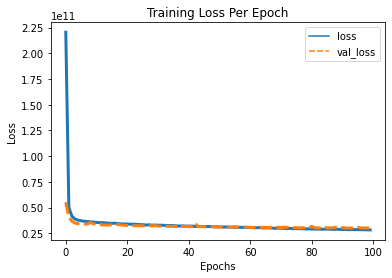

MSE: 25960431252.44666


In [ ]:
# 4 Hidden Layers
opt = Adam(learning_rate=0.1)
model = Sequential()
model.add(Dense(16, activation='relu')) #Input layer
model.add(Dense(16, activation='relu')) #Hidden layer
model.add(Dense(16, activation='relu')) #Hidden layer
model.add(Dense(16, activation='relu')) #Hidden layer
model.add(Dense(16, activation='relu')) #Hidden layer
model.add(Dense(1)) #Output layer
model.compile(optimizer = 'adam', loss='mse')
model.fit(X_train_std, y_train, validation_data=(X_val_std, y_val), epochs=100, batch_size=16)
lr_train_loss = pd.DataFrame(model.history.history)
loss_function_graph(lr_train_loss)
y_pred = model.predict(X_test_std)
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))

Epoch 1/100
790/790 [==============================] - 3s 3ms/step - loss: 129225031680.0000 - val_loss: 42861219840.0000
Epoch 2/100
790/790 [==============================] - 2s 2ms/step - loss: 42655997952.0000 - val_loss: 37165719552.0000
Epoch 3/100
790/790 [==============================] - 2s 2ms/step - loss: 39457439744.0000 - val_loss: 35092881408.0000
Epoch 4/100
790/790 [==============================] - 2s 3ms/step - loss: 37832630272.0000 - val_loss: 34357819392.0000
Epoch 5/100
790/790 [==============================] - 4s 4ms/step - loss: 36791197696.0000 - val_loss: 33496379392.0000
Epoch 6/100
790/790 [==============================] - 3s 4ms/step - loss: 35713024000.0000 - val_loss: 33113985024.0000
Epoch 7/100
790/790 [==============================] - 2s 3ms/step - loss: 35210899456.0000 - val_loss: 33048242176.0000
Epoch 8/100
790/790 [==============================] - 3s 3ms/step - loss: 34924974080.0000 - val_loss: 33131354112.0000
Epoch 9/100
790/790 [==========

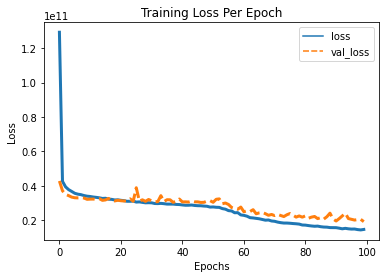

MSE: 14683457746.865904


In [ ]:
# 5 Hidden Layers
opt = Adam(learning_rate=0.1)
model = Sequential()
model.add(Dense(16, activation='relu')) #Input layer
model.add(Dense(16, activation='relu')) #Hidden layer
model.add(Dense(16, activation='relu')) #Hidden layer
model.add(Dense(16, activation='relu')) #Hidden layer
model.add(Dense(16, activation='relu')) #Hidden layer
model.add(Dense(16, activation='relu')) #Hidden layer
model.add(Dense(1)) #Output layer
model.compile(optimizer = 'adam', loss='mse')
model.fit(X_train_std, y_train, validation_data=(X_val_std, y_val), epochs=100, batch_size=16)
lr_train_loss = pd.DataFrame(model.history.history)
loss_function_graph(lr_train_loss)
y_pred = model.predict(X_test_std)
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
print(mse)
x = [0, 1, 2, 3, 4, 5]
y = mse
plt.plot(x, y)
plt.xlabel('Number of Hidden Layers')
plt.ylabel('MSE')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlim([1, 5])
plt.ylim([20000000000,60000000000])
plt.show()


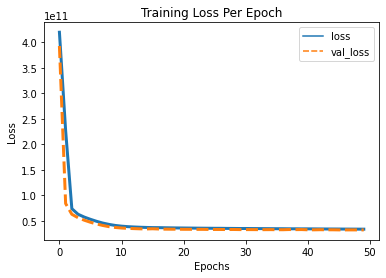

MSE =  29288790241.12536


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


For Training: 
Best Score: 29338138717.681774
Best Hyperparameters: {'learning_rate': 0.01}


In [ ]:
# Tuning learning rate
model = NN()
lr_train_loss = pd.DataFrame(model.history.history)
loss_function_graph(lr_train_loss)
y_pred1 = model.predict(X_test_std)
print('MSE = ', mean_squared_error(y_test, y_pred1))

parameters = {'learning_rate':[0.1, 0.01, 0.001]}
random_search(parameters)

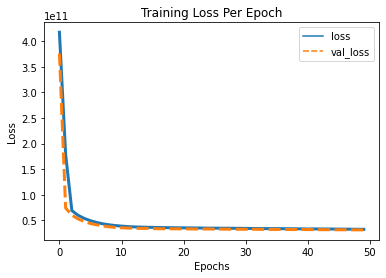

MSE =  28726286036.706173


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


For Training: 
Best Score: 28293399036.46685
Best Hyperparameters: {'batch_size': 16}


In [ ]:
# Tuning batch size
model = NN(optimizer = 'adam',neurons=16,batch_size=32,epochs=50,activation='relu',loss='mse', learning_rate=0.01)
lr_train_loss = pd.DataFrame(model.history.history)
loss_function_graph(lr_train_loss)
y_pred2 = model.predict(X_test_std)
print('MSE = ', mean_squared_error(y_test, y_pred2))


parameters = {'batch_size':[16,32,64]}
random_search(parameters)

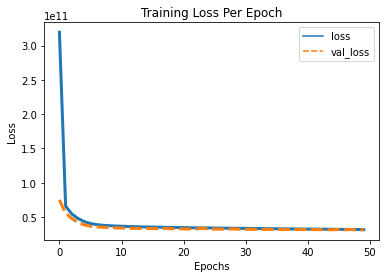

MSE =  27652754189.502632


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


For Training: 
Best Score: 26904493398.499054
Best Hyperparameters: {'epochs': 100}


In [ ]:
# Tuning the epochs
model = NN(optimizer = 'adam',neurons=16,batch_size=16,epochs=50,activation='relu',loss='mse', learning_rate=0.01)
lr_train_loss = pd.DataFrame(model.history.history)
loss_function_graph(lr_train_loss)
y_pred3 = model.predict(X_test_std)
print('MSE = ', mean_squared_error(y_test, y_pred3))


parameters = {'epochs':[25,50,100]}
random_search(parameters)

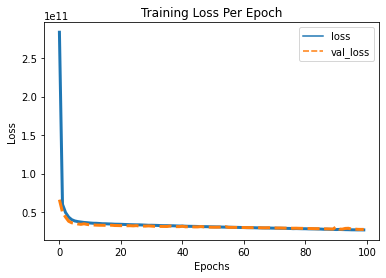

MSE =  24837584193.088055


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


For Training: 
Best Score: 29290018043.23878
Best Hyperparameters: {'activation': 'relu'}


In [ ]:
# Tuning the activation functions
model = NN(optimizer = 'adam',neurons=16,batch_size=16,epochs=100,activation='relu',loss='mse', learning_rate=0.01)
af_train_loss = pd.DataFrame(model.history.history)
loss_function_graph(af_train_loss)
y_pred4 = model.predict(X_test_std)
print('MSE = ', mean_squared_error(y_test, y_pred4))


parameters = {'activation':['relu', 'tanh', 'sigmoid']}
random_search(parameters)

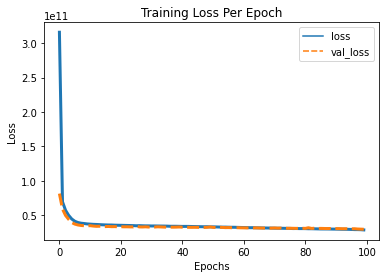

MSE =  25758081124.83682


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


For Training: 
Best Score: 29150317029.149017
Best Hyperparameters: {'optimizer': 'Adam'}


In [ ]:
#Tuning the optimizers
model = NN(optimizer = 'adam',neurons=16,batch_size=16,epochs=100,activation='relu',loss='mse', learning_rate=0.01)
lr_train_loss = pd.DataFrame(model.history.history)
loss_function_graph(lr_train_loss)
y_pred5 = model.predict(X_test_std)
print('MSE = ', mean_squared_error(y_test, y_pred5))


parameters = {'optimizer':['Adam','RMSprop', 'Adagrad']}
random_search(parameters)

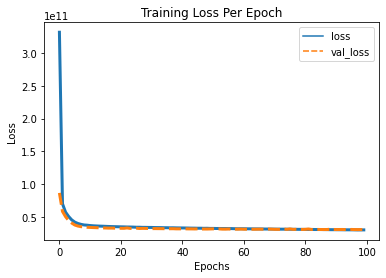

MSE =  27238544124.414692


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


For Training: 
Best Score: 29273362774.33842
Best Hyperparameters: {'loss': 'mse'}


In [ ]:
#Tuning the loss function
model = NN(optimizer = 'adam',neurons=16,batch_size=16,epochs=100,activation='relu',loss='mse', learning_rate=0.01)
lr_train_loss = pd.DataFrame(model.history.history)
loss_function_graph(lr_train_loss)
y_pred6 = model.predict(X_test_std)
print('MSE = ', mean_squared_error(y_test, y_pred6))


parameters = {'loss':['mse', 'mae']}
random_search(parameters)

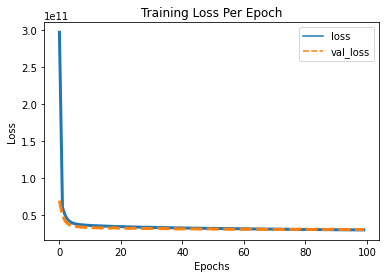

MSE =  27590266272.67395


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


For Training: 
Best Score: 27983144083.220467
Best Hyperparameters: {'neurons': 32}


In [ ]:
#Tuning the number of neurons
model = NN(optimizer = 'adam',neurons=16,batch_size=16,epochs=100,activation='relu',loss='mse', learning_rate=0.01)
lr_train_loss = pd.DataFrame(model.history.history)
loss_function_graph(lr_train_loss)
y_pred7 = model.predict(X_test_std)
print('MSE = ', mean_squared_error(y_test, y_pred7))


parameters = {'neurons':[8,16,32]}
random_search(parameters)

Epoch 1/130
790/790 [==============================] - 2s 2ms/step - loss: 388017.4062 - val_loss: 220038.8750
Epoch 2/130
790/790 [==============================] - 1s 2ms/step - loss: 186274.2031 - val_loss: 160084.2500
Epoch 3/130
790/790 [==============================] - 1s 1ms/step - loss: 146601.3438 - val_loss: 133496.8906
Epoch 4/130
790/790 [==============================] - 1s 1ms/step - loss: 129168.2266 - val_loss: 121693.0312
Epoch 5/130
790/790 [==============================] - 1s 1ms/step - loss: 120110.9219 - val_loss: 115680.2266
Epoch 6/130
790/790 [==============================] - 1s 2ms/step - loss: 115542.3672 - val_loss: 112527.0312
Epoch 7/130
790/790 [==============================] - 1s 2ms/step - loss: 113475.3828 - val_loss: 111237.9219
Epoch 8/130
790/790 [==============================] - 1s 1ms/step - loss: 112281.8594 - val_loss: 110334.2344
Epoch 9/130
790/790 [==============================] - 1s 1ms/step - loss: 111524.5156 - val_loss: 109763.6094
E

Text(0, 0.5, 'Predicted Values')

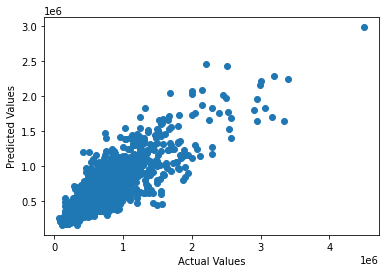

In [ ]:
# Create Best Models
opt = Adam(learning_rate=0.1)
bestmodel = Sequential()
bestmodel.add(Dense(16, activation='relu')) #Input layer
bestmodel.add(Dense(16, activation='relu')) #Hidden layer
bestmodel.add(Dense(16, activation='relu')) #Hidden layer
bestmodel.add(Dense(16, activation='relu')) #Hidden layer
bestmodel.add(Dense(16, activation='relu')) #Hidden layer
bestmodel.add(Dense(16, activation='relu')) #Hidden layer
bestmodel.add(Dense(1)) #Output layer
bestmodel.compile(optimizer = 'adam', loss='mse')
bestmodel.fit(X_train_std, y_train, validation_data=(X_val_std, y_val), epochs=100, batch_size=16)

y_pred = bestmodel.predict(X_test_std)
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))


pred_y = bestmodel.predict(X_test_std)
print('MSE:', metrics.mean_squared_error(y_test, pred_y))
print("r-squared score is {} values. RMSE is {}".format(r2_score(y_test, pred_y), len(y_test), mean_squared_error(y_test, pred_y)))

plt.scatter(y_test, pred_y)
plt.xlabel("Actual Values")
plt.ylabel('Predicted Values')

Epoch 1/100
790/790 [==============================] - 2s 2ms/step - loss: 120117600256.0000 - val_loss: 39924465664.0000
Epoch 2/100
790/790 [==============================] - 2s 2ms/step - loss: 41385455616.0000 - val_loss: 37068365824.0000
Epoch 3/100
790/790 [==============================] - 2s 2ms/step - loss: 38907363328.0000 - val_loss: 36186046464.0000
Epoch 4/100
790/790 [==============================] - 2s 2ms/step - loss: 37834280960.0000 - val_loss: 34801053696.0000
Epoch 5/100
790/790 [==============================] - 2s 2ms/step - loss: 36838633472.0000 - val_loss: 35122696192.0000
Epoch 6/100
790/790 [==============================] - 2s 2ms/step - loss: 36566654976.0000 - val_loss: 33994422272.0000
Epoch 7/100
790/790 [==============================] - 2s 2ms/step - loss: 36079702016.0000 - val_loss: 33767215104.0000
Epoch 8/100
790/790 [==============================] - 2s 2ms/step - loss: 35878629376.0000 - val_loss: 35837341696.0000
Epoch 9/100
790/790 [==========

Text(0, 0.5, 'Predicted Values')

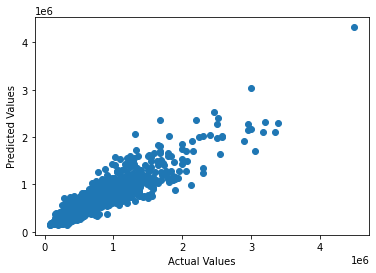

In [ ]:
# Create Best Models
opt = Adam(learning_rate=0.01)
bestmodel = Sequential()
bestmodel.add(Dense(16, activation='relu')) #Input layer
bestmodel.add(Dense(40, activation='relu')) #Hidden layer
bestmodel.add(Dense(40, activation='relu')) #Hidden layer
bestmodel.add(Dense(40, activation='relu')) #Hidden layer
bestmodel.add(Dense(40, activation='relu')) #Hidden layer
bestmodel.add(Dense(40, activation='relu')) #Hidden layer
bestmodel.add(Dense(1)) #Output layer
bestmodel.compile(optimizer = 'adam', loss='mse')
bestmodel.fit(X_train_std, y_train, validation_data=(X_val_std, y_val), epochs=100, batch_size=16)

pred_y = bestmodel.predict(X_test_std)
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
mse.append(metrics.mean_squared_error(y_test, y_pred))

print('MSE:', metrics.mean_squared_error(y_test, pred_y))
print("r-squared score is {} values. RMSE is {}".format(r2_score(y_test, pred_y), len(y_test), mean_squared_error(y_test, pred_y)))

plt.scatter(y_test, pred_y)
plt.xlabel("Actual Values")
plt.ylabel('Predicted Values')